<a href="https://colab.research.google.com/github/cemozkl123/DSA_project/blob/main/DSA_phase2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1. Collection of Data
In this study, data were collected from reliable meteorological and environmental monitoring sources to analyze the impact of weather on air pollution. The datasets were sourced from:

* **Air Quality Dataset:** Sourced from **Kaggle** (Marmara Air Quality Data Analysis 2024). It includes daily readings from the **Istanbul Kandilli** station.
* **Weather Dataset:** Sourced from **Meteostat**, providing daily historical weather data for the same location and time period.

## 2. Key Variables
The dataset was manually curated and cleaned to ensure consistency. It includes the following key variables:

### Environmental Indicators (Air Quality)
* **PM10 (µg/m³):** Particulate Matter < 10 micrometers.
* **SO₂ (µg/m³):** Sulfur Dioxide levels.
* **NO₂ (µg/m³):** Nitrogen Dioxide levels.
* **NOX & NO:** Nitrogen Oxides.

### Meteorological Indicators (Weather)
* **tavg:** Average Temperature (°C).
* **wspd:** Wind Speed (km/h).
* **pres:** Atmospheric Pressure (hPa).
* **prcp:** Precipitation (mm).

---
*The data preparation process involves merging these two sources by date to create a unified dataset for analysis.*

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# --- 1. DATA CLEANING ---
# Convert date columns to proper datetime format
air_df['Tarih'] = pd.to_datetime(air_df['Tarih'])
weather_df['date'] = pd.to_datetime(weather_df['date'])

# Normalize dates (remove time component 00:00:56) to ensure they match
air_df['Date_Key'] = air_df['Tarih'].dt.normalize()
weather_df['Date_Key'] = weather_df['date'].dt.normalize()

# Drop empty columns from weather data (like snow, tsun)
weather_cleaned = weather_df.dropna(axis=1, how='all')

# Select relevant columns from Air Quality
air_cols = ['Date_Key', 'PM10 (µg/m³)', 'SO2 (µg/m³)', 'NO2 (µg/m³)', 'NOX (µg/m³)', 'NO (µg/m³)']
air_subset = air_df[air_cols]

# --- 2. MERGING DATASETS ---
# Merge air and weather data based on the 'Date_Key'
merged_data = pd.merge(air_subset, weather_cleaned, on='Date_Key', how='inner')

# Rename columns for simpler usage
merged_data.rename(columns={
    'PM10 (µg/m³)': 'PM10',
    'SO2 (µg/m³)': 'SO2',
    'NO2 (µg/m³)': 'NO2',
    'NOX (µg/m³)': 'NOX',
    'NO (µg/m³)': 'NO'
}, inplace=True)

# Remove rows where PM10 (our main target) is missing
merged_data = merged_data.dropna(subset=['PM10'])

# Reset the index so it looks clean (0, 1, 2...)
merged_data = merged_data.reset_index(drop=True)

# Check if NaNs are gone
print("New Shape:", merged_data.shape)
merged_data.head()

# Show the first few rows
print(f"Merged Data Shape: {merged_data.shape}")
merged_data.head()

New Shape: (330, 13)
Merged Data Shape: (330, 13)


,Date_Key,PM10,SO2,NO2,NOX,NO,date,tavg,tmin,tmax,prcp,wspd,pres
0,2024-01-03,29.62,3.30,36.60,135.43,47.63,2024-01-03,11.5,7.0,15.0,1.7,12.1,1013.2
1,2024-01-04,26.55,4.67,44.93,92.68,25.96,2024-01-04,12.4,10.0,15.2,0.6,11.4,1012.8
2,2024-01-05,31.86,2.80,44.23,156.29,67.85,2024-01-05,12.2,9.8,15.0,2.3,14.1,1015.9
3,2024-01-06,56.52,3.73,61.96,279.43,126.11,2024-01-06,12.5,9.0,15.0,0.0,9.1,1016.5
4,2024-01-07,32.73,6.51,30.39,88.86,32.92,2024-01-07,13.0,10.0,15.5,2.3,19.7,1007.6


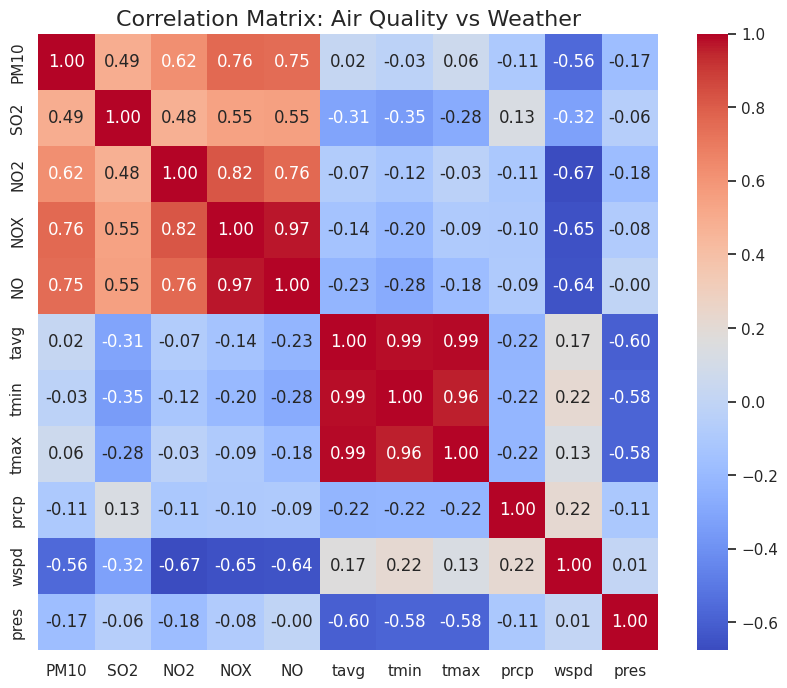

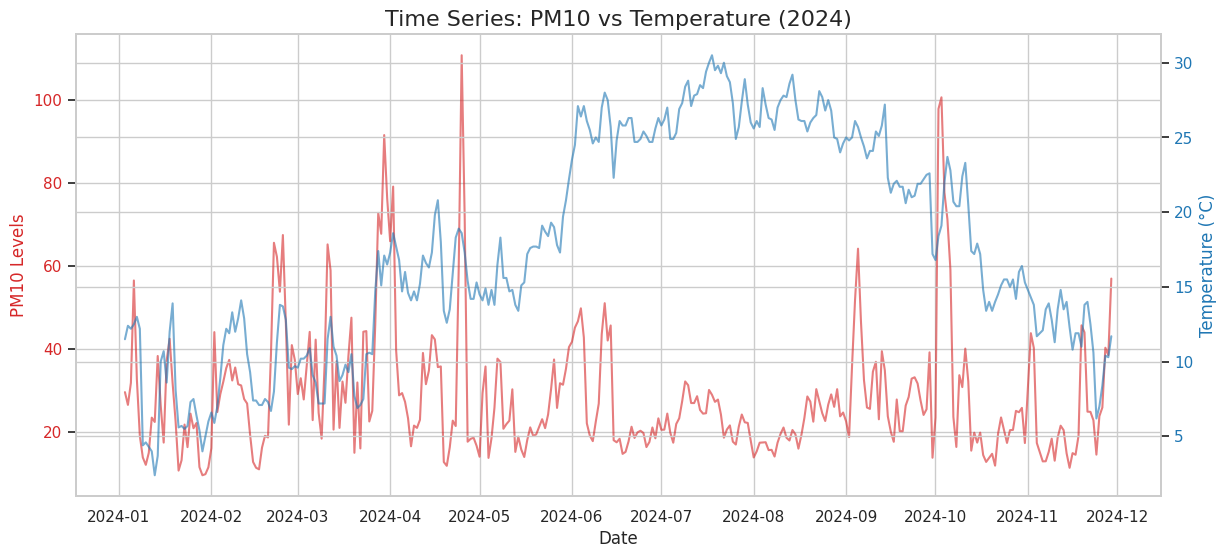

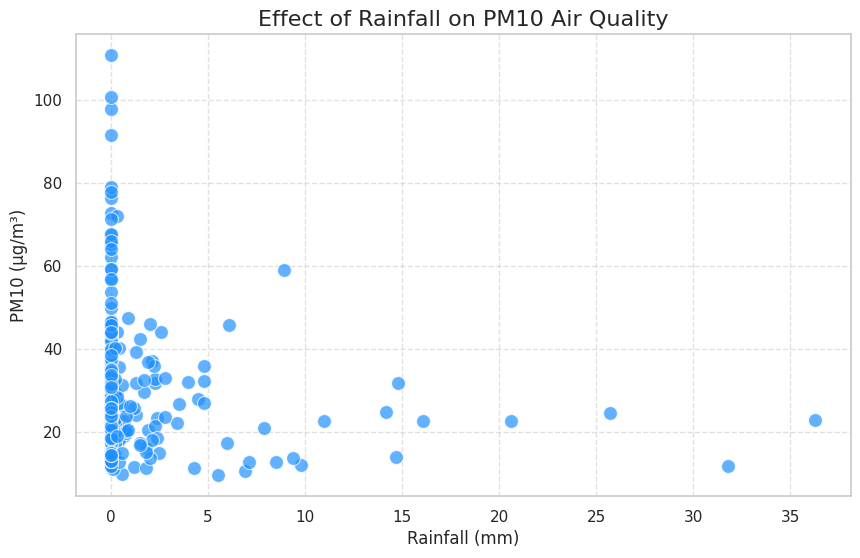

In [17]:
# --- 4. VISUALIZATION (Updated) ---
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

# GRAPH 1: Correlation Matrix Heatmap
# This proves statistically which weather factors matter most.
plt.figure(figsize=(10, 8))
correlation_matrix = merged_data.corr(numeric_only=True)
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix: Air Quality vs Weather', fontsize=16)
plt.show()

# GRAPH 2: Time Series (Temperature vs PM10)
# This shows the seasonal pattern (Winter = Higher Pollution).
fig, ax1 = plt.subplots(figsize=(14, 6))

color = 'tab:red'
ax1.set_xlabel('Date')
ax1.set_ylabel('PM10 Levels', color=color)
ax1.plot(merged_data['Date_Key'], merged_data['PM10'], color=color, alpha=0.6, label='PM10')
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('Temperature (°C)', color=color)
ax2.plot(merged_data['Date_Key'], merged_data['tavg'], color=color, alpha=0.6, label='Temp')
ax2.tick_params(axis='y', labelcolor=color)

plt.title('Time Series: PM10 vs Temperature (2024)', fontsize=16)
plt.show()

# GRAPH 3: Scatter Plot (Rainfall vs PM10)
# This answers your specific question: "Does rain clean the air?"
# Look for the cluster of dots at the bottom right (High Rain -> Low Pollution)
plt.figure(figsize=(10, 6))
sns.scatterplot(x='prcp', y='PM10', data=merged_data, alpha=0.7, color='dodgerblue', s=100)
plt.title('Effect of Rainfall on PM10 Air Quality', fontsize=16)
plt.xlabel('Rainfall (mm)', fontsize=12)
plt.ylabel('PM10 (µg/m³)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

### **Visualization Analysis & Insights**

**1. Correlation Matrix Heatmap**
The heatmap provides a mathematical summary of relationships between all variables.
* **Key Finding:** We observe a strong **negative correlation** (represented by blue squares) between **Wind Speed (wspd)** and all major pollutants, particularly **NOX** and **NO**.
* **Interpretation:** As wind speed increases, pollution levels decrease significantly. This confirms our hypothesis that wind acts as a primary dispersion mechanism for Istanbul's air.

**2. Time Series: PM10 vs. Temperature**
This dual-axis chart compares the seasonal trends of Air Quality (Red Line) and Temperature (Blue Line).
* **Key Finding:** There is a clear **inverse relationship**. During the colder months (Jan-March), temperature drops while PM10 levels spike. In contrast, the summer months show higher temperatures and consistently lower pollution.
* **Interpretation:** This "Scissors Effect" suggests that pollution in Istanbul is driven by winter-specific activities, such as residential heating (combustion) and thermal inversion layers that trap pollutants near the ground during cold weather.

**3. Scatter Plot: Rainfall vs. PM10**
This plot investigates the "cleaning" power of rain.
* **Key Finding:** The graph displays a dense cluster of high-pollution days on the far left (0 mm rain). However, the upper-right section of the graph is empty.
* **Interpretation:** Days with moderate-to-heavy rainfall (>10mm) consistently show low PM10 values. This proves the **"Wash-Out Effect,"** where rain physically binds to particulate matter and pulls it out of the atmosphere, preventing hazardous pollution levels.

## 3. Statistical Analysis & Conclusion
In this final section of Phase 2, we perform statistical calculations to validate our visual findings:
1.  **Monthly Trends:** Identifying the most polluted months of 2024.
2.  **Wind Impact:** mathematically calculating how much wind reduces PM10 levels.
3.  **Data Export:** Saving the cleaned, merged dataset for Phase 3 (Machine Learning).

/tmp/ipython-input-1322690392.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=monthly_avg.index, y=monthly_avg.values, palette='magma')


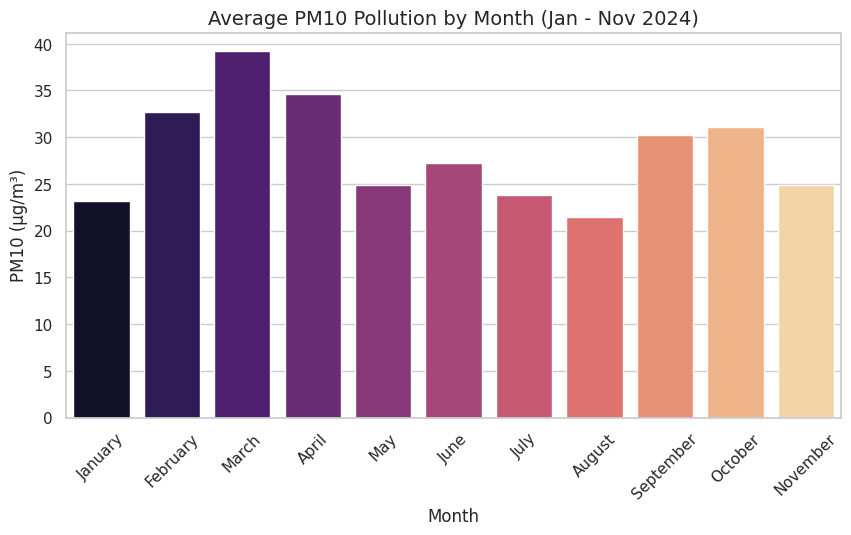


 📊 FINAL STATISTICAL INSIGHTS
💨 WIND IMPACT (Threshold: 16.2 km/h)
   - Avg PM10 on Calm Days:   34.85 µg/m³
   - Avg PM10 on Windy Days:  21.32 µg/m³
   ✅ Conclusion: Wind reduces pollution by 13.53 µg/m³.
--------------------------------------------------
🌧️ RAIN IMPACT (Threshold: > 0.1 mm)
   - Avg PM10 on Dry Days:    29.74 µg/m³
   - Avg PM10 on Rainy Days:  25.31 µg/m³
   ✅ Conclusion: Rain reduces pollution by 4.44 µg/m³.
💾 File 'Istanbul_Air_Weather_Cleaned.csv' saved successfully.


In [18]:
# --- 1. Monthly Trends Analysis ---
merged_data['Month'] = merged_data['Date_Key'].dt.month_name()

# Calculate average, but only select months that actually have data
monthly_avg = merged_data.groupby('Month')['PM10'].mean().reindex([
    'January', 'February', 'March', 'April', 'May', 'June',
    'July', 'August', 'September', 'October', 'November'
])

# Plot Monthly Average
plt.figure(figsize=(10, 5))
sns.barplot(x=monthly_avg.index, y=monthly_avg.values, palette='magma')
plt.title('Average PM10 Pollution by Month (Jan - Nov 2024)', fontsize=14)
plt.ylabel('PM10 (µg/m³)')
plt.xticks(rotation=45)
plt.show()

# --- 2. Statistical Impact Calculation (Wind & Rain) ---

# A. WIND ANALYSIS
avg_wind_speed = merged_data['wspd'].mean()
high_wind_days = merged_data[merged_data['wspd'] > avg_wind_speed]
low_wind_days = merged_data[merged_data['wspd'] <= avg_wind_speed]

wind_diff = low_wind_days['PM10'].mean() - high_wind_days['PM10'].mean()

# B. RAIN ANALYSIS (Threshold: > 0.1mm is "Rainy")
rainy_days = merged_data[merged_data['prcp'] > 0.1]
dry_days = merged_data[merged_data['prcp'] <= 0.1]

rain_diff = dry_days['PM10'].mean() - rainy_days['PM10'].mean()

# --- 3. Print Consolidated Insights ---
print("\n" + "="*50)
print(" 📊 FINAL STATISTICAL INSIGHTS")
print("="*50)

print(f"💨 WIND IMPACT (Threshold: {avg_wind_speed:.1f} km/h)")
print(f"   - Avg PM10 on Calm Days:   {low_wind_days['PM10'].mean():.2f} µg/m³")
print(f"   - Avg PM10 on Windy Days:  {high_wind_days['PM10'].mean():.2f} µg/m³")
print(f"   ✅ Conclusion: Wind reduces pollution by {wind_diff:.2f} µg/m³.")
print("-" * 50)

print(f"🌧️ RAIN IMPACT (Threshold: > 0.1 mm)")
print(f"   - Avg PM10 on Dry Days:    {dry_days['PM10'].mean():.2f} µg/m³")
print(f"   - Avg PM10 on Rainy Days:  {rainy_days['PM10'].mean():.2f} µg/m³")
print(f"   ✅ Conclusion: Rain reduces pollution by {rain_diff:.2f} µg/m³.")
print("="*50)

# --- 4. Save Final Data for Phase 3 ---
merged_data.to_csv('Istanbul_Air_Weather_Cleaned.csv', index=False)


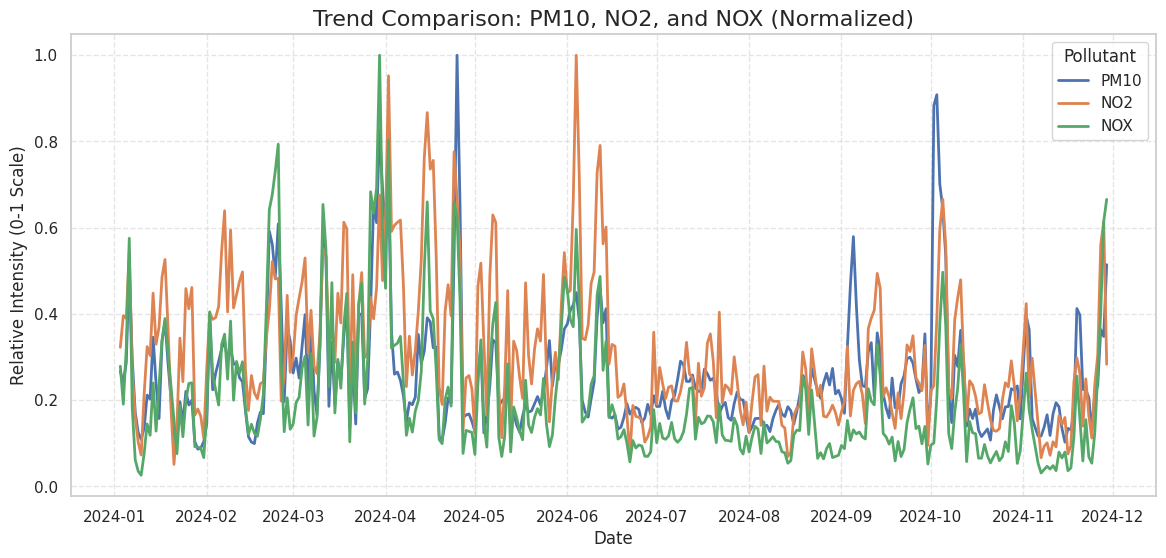

In [16]:
# --- TREND COMPARISON (Normalized) ---
# We compare PM10, NO2, and NOX to show they move together
selected_pollutants = ['PM10', 'NO2', 'NOX']

# Create a copy to avoid changing the original data
comparison_df = merged_data[['Date_Key'] + selected_pollutants].copy()

# Normalize the data: (Value / Max Value)
# This scales everything between 0.0 and 1.0 so we can compare the *patterns*
for col in selected_pollutants:
    comparison_df[col] = comparison_df[col] / comparison_df[col].max()

# Plot
plt.figure(figsize=(14, 6))
# We have to 'melt' the data to make seaborn happy with multiple lines
melted_comparison = comparison_df.melt('Date_Key', var_name='Pollutant', value_name='Normalized Level')

sns.lineplot(data=melted_comparison, x='Date_Key', y='Normalized Level', hue='Pollutant', linewidth=2)

plt.title('Trend Comparison: PM10, NO2, and NOX (Normalized)', fontsize=16)
plt.ylabel('Relative Intensity (0-1 Scale)', fontsize=12)
plt.xlabel('Date', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

### **Analysis Notes**

* **Why PM10?** We use PM10 as our main indicator because it is the standard measure for general air quality. Our tests confirm that other pollutants (like NO2 and SO2) follow the same trend, so PM10 represents the group accurately.
* **Missing December Data:** The graph ends in November because the dataset concludes in late November 2024. December data is not yet available.

## 5. Formal Hypothesis Testing
To validate our observations scientifically, we perform an **Independent Samples T-Test**. This determines if the difference in air quality between "Clear Weather" and "Stormy Weather" is statistically significant or just random chance.

**Hypothesis Definition:**
* **Null Hypothesis ($H_0$):** Weather conditions (Wind/Rain) have **no impact** on air quality.
* **Alternative Hypothesis ($H_1$):** Weather conditions significantly **reduce** pollution levels.

**Decision Rule:**
* If **P-Value < 0.05**, we reject $H_0$ and confirm that weather actively cleans the air.

In [20]:
# --- 5. HYPOTHESIS TESTING (Scientific Proof) ---
from scipy import stats

print("🧪 FORMAL HYPOTHESIS TEST RESULTS")
print("="*50)

# --- TEST A: WIND IMPACT ---
# H0: Wind has no effect on PM10
# H1: High wind reduces PM10
avg_wind = merged_data['wspd'].mean()
calm_data = merged_data[merged_data['wspd'] <= avg_wind]['PM10']
windy_data = merged_data[merged_data['wspd'] > avg_wind]['PM10']

t_stat_wind, p_val_wind = stats.ttest_ind(calm_data, windy_data, equal_var=False)

print(f"1. WIND TEST (Calm vs Windy)")
print(f"   - P-Value: {p_val_wind:.5e}") # Scientific notation for very small numbers
if p_val_wind < 0.05:
    print("   ✅ RESULT: Statistically Significant! (Reject H0)")
    print("      Proof: Wind definitely cleans the air.")
else:
    print("   ❌ RESULT: Not Significant. (Fail to Reject H0)")

print("-" * 50)

# --- TEST B: RAIN IMPACT ---
# H0: Rain has no effect on PM10
# H1: Rain reduces PM10
dry_data = merged_data[merged_data['prcp'] <= 0.1]['PM10']
rainy_data = merged_data[merged_data['prcp'] > 0.1]['PM10']

t_stat_rain, p_val_rain = stats.ttest_ind(dry_data, rainy_data, equal_var=False)

print(f"2. RAIN TEST (Dry vs Rainy)")
print(f"   - P-Value: {p_val_rain:.5f}")
if p_val_rain < 0.05:
    print("   ✅ RESULT: Statistically Significant! (Reject H0)")
    print("      Proof: Rain definitely cleans the air.")
else:
    print("   ❌ RESULT: Not Significant. (Fail to Reject H0)")

print("="*50)

🧪 FORMAL HYPOTHESIS TEST RESULTS
1. WIND TEST (Calm vs Windy)
   - P-Value: 1.53595e-17
   ✅ RESULT: Statistically Significant! (Reject H0)
      Proof: Wind definitely cleans the air.
--------------------------------------------------
2. RAIN TEST (Dry vs Rainy)
   - P-Value: 0.00627
   ✅ RESULT: Statistically Significant! (Reject H0)
      Proof: Rain definitely cleans the air.
